# Differential Expression Analysis in GenePattern Notebook

Find genes that are significantly differentially expressed between classes of samples.

## Before you begin

* Sign in to GenePattern by entering your username and password into the form below. 
* Gene expression data must be in a [GCT or RES file](https://genepattern.broadinstitute.org/gp/pages/protocols/GctResFiles.html).
    * Example file: [all_aml_test.gct](https://datasets.genepattern.org/data/all_aml/all_aml_test.gct).
* The class of each sample must be identified in a [CLS file](https://genepattern.broadinstitute.org/gp/pages/protocols/ClsFiles.html).
    * Example file: [all_aml_test.cls](https://datasets.genepattern.org/data/all_aml/all_aml_test.cls).
* Learn more by reading about [file formats](http://www.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT).


In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Step 0: Import data from GEO

In [8]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [9]:
geoimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')
geoimporter_job_spec = geoimporter_task.make_job_spec()
geoimporter_job_spec.set_parameter("GEO.accession", "GSE10325")
geoimporter_job_spec.set_parameter("GEO.SOFT.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run5585897434122589070.tmp/GSE10325_family%20%281%29.soft.gz")
geoimporter_job_spec.set_parameter("Drop.NA.Rows", "TRUE")
geoimporter_job_spec.set_parameter("data.column.name", "VALUE")
geoimporter_job_spec.set_parameter("output.filename", "<GEO.accession><GEO.SOFT.file_basename>")
geoimporter_job_spec.set_parameter("ftp.proxy.server", "")
geoimporter_job_spec.set_parameter("ftp.proxy.username", "")
geoimporter_job_spec.set_parameter("ftp.proxy.password", "")
geoimporter_job_spec.set_parameter("http.proxy.server", "")
geoimporter_job_spec.set_parameter("http.proxy.username", "")
geoimporter_job_spec.set_parameter("http.proxy.password", "")
geoimporter_job_spec.set_parameter("job.memory", "2Gb")
geoimporter_job_spec.set_parameter("job.walltime", "02:00:00")
geoimporter_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(geoimporter_task)

job479074 = gp.GPJob(genepattern.session.get(0), 479074)
genepattern.display(job479074)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')

GPJobWidget(job_number=479074)

## Step 1: PreprocessDataset

Preprocess gene expression data to remove platform noise and genes that have little variation. You can test this step by starting a job using parameters entered into the form below.

### Considerations

* PreprocessDataset can preprocess the data in one or more ways (in this order):
    1. Set threshold and ceiling values. Any value lower/higher than the threshold/ceiling value is reset to the threshold/ceiling value.
    2. Convert each expression value to the log base 2 of the value.
    3. Remove genes (rows) if a given number of its sample values are less than a given threshold.
    4. Remove genes (rows) that do not have a minimum fold change or expression variation.
    5. Discretize or normalize the data.
* ComparativeMarkerSelection expects non-log-transformed data. Some calculations, such as Fold Change, will produce incorrect results on log transformed data.
* If you did not generate the expression data, check whether preprocessing steps have already been taken before running the PreprocessDataset module.
* Learn more by reading about the [PreprocessDataset](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=PreprocessDataset) module.

<div class="alert alert-info">
<h3 style="position: relative; top: -10px">Instructions</h3>
Click the *Run* button on the analysis below.</div>

In [10]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://cloud.genepattern.org/gp/jobResults/479074/GSE10325GSE10325_family%20%281%29.soft.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "0")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "20000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "1")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.log2.preprocessed")
genepattern.display(preprocessdataset_task)

job479075 = gp.GPJob(genepattern.session.get(0), 479075)
genepattern.display(job479075)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

GPJobWidget(job_number=479075)

## Step 1.5: Create CLS File for phenote type

In [11]:
clsfilecreator_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')
clsfilecreator_job_spec = clsfilecreator_task.make_job_spec()
clsfilecreator_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479074/GSE10325GSE10325_family%20%281%29.soft.gct")
clsfilecreator_job_spec.set_parameter("job.memory", "2Gb")
clsfilecreator_job_spec.set_parameter("job.walltime", "02:00:00")
clsfilecreator_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(clsfilecreator_task)

job478677 = gp.GPJob(genepattern.session.get(0), 478677)
genepattern.display(job478677)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')

GPJobWidget(job_number=478677)

## Step 2: ComparativeMarkerSelection

ComparativeMarkerSelection computes differential gene expression. For each gene, it uses a test statistic to calculate the difference in gene expression between classes and then computes a p-value to estimate the significance of the test statistic score.

Because testing tens of thousands of genes simultaneously increases the possibility of mistakenly identifying a non-marker gene as a marker gene (a false positive), ComparativeMarkerSelection corrects for multiple hypothesis testing by computing both false discovery rates (FDR) and family-wise error rates (FWER). 

### Considerations

* If the data set includes at least 10 samples per class, use the default value of 1000 permutations to ensure accurate p-values. If the data set includes fewer than 10 samples in any class, permuting the samples cannot give an accurate p-value; specify 0 permutations to use asymptotic p-values instead.
* If the data set includes more than two classes, use the phenotype test parameter to analyze each class against all others (one-versus-all) or all class pairs (all pairs).
* Learn more by reading about the [ComparativeMarkerSelection](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelection) module.


<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the PreprocessDataset job above finishes running, send the GCT result of that job to ComparativeMarkerSelection below. To do this either drag-and-drop the link for the file above to the *input.file* input below, or click the link for the file above and select *Send to an Existing GenePattern Cell > ComparativeMarkerSelection* in the menu that appears.</p>

<p>For your convenience, the necessary CLS file for ComparativeMarkerSelection is already supplied for the analysis below. Once this is done, click *Run* for the analysis below.</p>
</div>

In [12]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479075/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run6035814643691556608.tmp/GSE10325GSE10325_family.soft.preprocessed.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "true")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.display(comparativemarkerselection_task)

job479076 = gp.GPJob(genepattern.session.get(0), 479076)
genepattern.display(job479076)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')

GPJobWidget(job_number=479076)

## Step 3: ComparativeMarkerSelectionViewer

Run the ComparativeMarkerSelectionViewer module to view the results. The viewer displays the test statistic score, its p value, two FDR statistics and three FWER statistics for each gene. 

### Considerations

* Generally, researchers identify marker genes based on FDR rather than the more conservative FWER.
* Often, marker genes are identified based on an FDR cutoff value of .05, which indicates that a gene identified as a marker gene has a 1 in 20 (5%) chance of being a false positive. Select Edit>Filter Features>Custom Filter to filter results based on that criteria (or any other).
* Learn more by reading about the [ComparativeMarkerSelectionViewer](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelectionViewer) module.

<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the ComparativeMarkerSelection job above finishes, send the ODF result of that job to ComparativeMarkerSelectionViewer below. This can be achieved in a method similar to the one described in the last step.</p>
<p>Once this is accomplished, go back up to the PreprocessDataset job and also send its GCT output to ComparativeMarkerSelectionViewer.</p>

<p>Once both files are sent, click *Run* for the analysis below. Once the job downloads the necessary data it should display a visualization of the differential expression results.</p>
</div>

In [13]:
comparativemarkerselectionviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')
comparativemarkerselectionviewer_job_spec = comparativemarkerselectionviewer_task.make_job_spec()
comparativemarkerselectionviewer_job_spec.set_parameter("comparative.marker.selection.filename", "")
comparativemarkerselectionviewer_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479075/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.gct")
genepattern.display(comparativemarkerselectionviewer_task)

job479078 = gp.GPJob(genepattern.session.get(0), 479078)
genepattern.display(job479078)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')

GPJobWidget(job_number=479078)

In [17]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_odf_479076 = ODF(job479076.get_file("GSE10325GSE10325_family (1).soft.log2.preprocessed.comp.marker.odf"))
gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_odf_479076

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,29,204932_at,BF433902,4.905501,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.0708,0.0708,1.507015,3.799437,0.615415,2.292422,1.775725,0
1,33,216390_at,X06537,4.658496,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.1436,0.1436,0.897737,4.468953,0.645252,3.571216,0.931894,0
2,44,213417_at,AW173045,4.450900,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.2451,0.2453,0.913746,4.799449,0.932513,3.885703,0.657639,0
3,45,221476_s_at,AF279903,4.402331,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.2776,0.2777,0.431778,12.533355,0.327470,12.101577,0.475181,0
4,56,205226_at,NM_006207,4.205080,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.4294,0.4301,1.353241,4.341723,1.162843,2.988482,1.468163,0
5,71,210036_s_at,AB044806,3.971618,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.6382,0.6393,0.576735,7.328961,0.474858,6.752226,0.712967,0
6,73,212085_at,AA916851,3.949458,0.0004,0.000030,0.000640,0.091870,0.083141,1.0,0.6584,0.6594,0.376994,12.260708,0.307390,11.883714,0.473014,1
7,75,206276_at,NM_003695,3.937205,0.0004,0.000030,0.000640,0.091870,0.083141,1.0,0.6700,0.6710,0.682998,3.161404,0.746998,2.478407,0.629601,1
8,80,205051_s_at,NM_000222,3.908388,0.0006,0.000121,0.000943,0.122634,0.112721,1.0,0.6967,0.6978,0.942887,5.219883,0.969485,4.276997,0.980130,2
9,90,204657_s_at,NM_003028,3.805783,0.0004,0.000030,0.000640,0.091870,0.083141,1.0,0.7837,0.7843,0.742769,5.619038,0.664453,4.876270,0.933057,1


In [26]:
id_refs = {
    'ELF1': ['212420','212418'],
    'IRF1': ['202531','238725'],
    'SYNGR1': ['204287','210613','213854'],
    'UNC5A': ['236448','243833'],
    'MT1F': ['213629','217165'],
}

def get_target_gene_ranking(gene_list,df):
    finding_result = pd.DataFrame(columns=df.columns)
    for gene_name, gene_id in gene_list.items():
        target_gene = df[(df['Feature'].str.contains(gene_id[0]))|(df['Feature'].str.contains(gene_id[1]))]
        finding_result = finding_result.append(target_gene)
#         finding_result['Gene_Name'] = gene_name
    return finding_result

In [27]:
# filter gene by FDR and get new ranking
df1 = gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_odf_479076
df1_new = df1[(df1['FDR(BH)'] <= 1.0)]
df1_new.insert(loc=1, column="Rank_2", value=list(df1_new['Score'].abs().rank(ascending=False)))
df1_new.loc[:,'Rank_2'] = df1_new['Rank_2'].astype(int)
df1_new

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,29,29,204932_at,BF433902,4.905501,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.0708,0.0708,1.507015,3.799437,0.615415,2.292422,1.775725,0
1,33,33,216390_at,X06537,4.658496,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.1436,0.1436,0.897737,4.468953,0.645252,3.571216,0.931894,0
2,44,44,213417_at,AW173045,4.450900,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.2451,0.2453,0.913746,4.799449,0.932513,3.885703,0.657639,0
3,45,45,221476_s_at,AF279903,4.402331,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.2776,0.2777,0.431778,12.533355,0.327470,12.101577,0.475181,0
4,56,56,205226_at,NM_006207,4.205080,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.4294,0.4301,1.353241,4.341723,1.162843,2.988482,1.468163,0
5,71,71,210036_s_at,AB044806,3.971618,0.0002,0.000000,0.000299,0.062756,0.083141,1.0,0.6382,0.6393,0.576735,7.328961,0.474858,6.752226,0.712967,0
6,73,73,212085_at,AA916851,3.949458,0.0004,0.000030,0.000640,0.091870,0.083141,1.0,0.6584,0.6594,0.376994,12.260708,0.307390,11.883714,0.473014,1
7,75,75,206276_at,NM_003695,3.937205,0.0004,0.000030,0.000640,0.091870,0.083141,1.0,0.6700,0.6710,0.682998,3.161404,0.746998,2.478407,0.629601,1
8,80,80,205051_s_at,NM_000222,3.908388,0.0006,0.000121,0.000943,0.122634,0.112721,1.0,0.6967,0.6978,0.942887,5.219883,0.969485,4.276997,0.980130,2
9,90,90,204657_s_at,NM_003028,3.805783,0.0004,0.000030,0.000640,0.091870,0.083141,1.0,0.7837,0.7843,0.742769,5.619038,0.664453,4.876270,0.933057,1


In [28]:
get_target_gene_ranking(id_refs,df1)

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
19847,5919,212420_at,AL559590,-1.296143,0.193761,0.185936,0.201422,0.753864,0.661320,1.0,1.0,1.0,0.294169,7.800945,1.007547,8.095114,0.771307,9032
20397,4497,212418_at,M82882,-1.497057,0.133573,0.126831,0.140158,0.694774,0.609458,1.0,1.0,1.0,0.285007,9.094937,0.774519,9.379944,0.760237,9333
21919,592,202531_at,NM_002198,-2.689734,0.012198,0.009988,0.014262,0.384983,0.339082,1.0,1.0,1.0,0.429083,9.924760,0.517370,10.353843,0.787189,9940
5662,9593,210613_s_at,BC000731,0.897200,0.378524,0.368927,0.387935,0.874874,0.767381,1.0,1.0,1.0,0.446434,4.979051,1.985198,4.532617,2.041276,1892
6885,11660,204287_at,NM_004711,0.723907,0.476105,0.466219,0.485793,0.907143,0.795597,1.0,1.0,1.0,0.166983,6.469554,0.963222,6.302571,0.884783,2380
21797,857,213629_x_at,BF246115,-2.488962,0.016997,0.014402,0.019445,0.428615,0.376838,1.0,1.0,1.0,0.386663,8.365018,0.546959,8.751681,0.724248,9916
21953,524,217165_x_at,M10943,-2.751175,0.005399,0.003912,0.006741,0.314932,0.277284,1.0,1.0,1.0,0.770656,7.548501,1.023707,8.319157,1.265117,9974


In [29]:
get_target_gene_ranking(id_refs,df1_new)

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
19847,5919,5919,212420_at,AL559590,-1.296143,0.193761,0.185936,0.201422,0.753864,0.661320,1.0,1.0,1.0,0.294169,7.800945,1.007547,8.095114,0.771307,9032
20397,4497,4497,212418_at,M82882,-1.497057,0.133573,0.126831,0.140158,0.694774,0.609458,1.0,1.0,1.0,0.285007,9.094937,0.774519,9.379944,0.760237,9333
21919,592,592,202531_at,NM_002198,-2.689734,0.012198,0.009988,0.014262,0.384983,0.339082,1.0,1.0,1.0,0.429083,9.924760,0.517370,10.353843,0.787189,9940
5662,9593,9593,210613_s_at,BC000731,0.897200,0.378524,0.368927,0.387935,0.874874,0.767381,1.0,1.0,1.0,0.446434,4.979051,1.985198,4.532617,2.041276,1892
6885,11660,11660,204287_at,NM_004711,0.723907,0.476105,0.466219,0.485793,0.907143,0.795597,1.0,1.0,1.0,0.166983,6.469554,0.963222,6.302571,0.884783,2380
21797,857,857,213629_x_at,BF246115,-2.488962,0.016997,0.014402,0.019445,0.428615,0.376838,1.0,1.0,1.0,0.386663,8.365018,0.546959,8.751681,0.724248,9916
21953,524,524,217165_x_at,M10943,-2.751175,0.005399,0.003912,0.006741,0.314932,0.277284,1.0,1.0,1.0,0.770656,7.548501,1.023707,8.319157,1.265117,9974


## Extract Gene Expression Value for plotting

In [14]:
extractcomparativemarkerresults_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')
extractcomparativemarkerresults_job_spec = extractcomparativemarkerresults_task.make_job_spec()
extractcomparativemarkerresults_job_spec.set_parameter("comparative.marker.selection.filename", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run2654339080060051244.tmp/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.comp.marker.odf")
extractcomparativemarkerresults_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479075/GSE10325GSE10325_family%20%281%29.soft.log2.preprocessed.gct")
extractcomparativemarkerresults_job_spec.set_parameter("statistic", "FDR(BH)")
extractcomparativemarkerresults_job_spec.set_parameter("min", "0")
extractcomparativemarkerresults_job_spec.set_parameter("max", "1.0")
extractcomparativemarkerresults_job_spec.set_parameter("number.of.neighbors", "")
extractcomparativemarkerresults_job_spec.set_parameter("base.output.name", "<comparative.marker.selection.filename_basename>.filt")
extractcomparativemarkerresults_job_spec.set_parameter("job.memory", "2Gb")
extractcomparativemarkerresults_job_spec.set_parameter("job.walltime", "02:00:00")
extractcomparativemarkerresults_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(extractcomparativemarkerresults_task)

job479079 = gp.GPJob(genepattern.session.get(0), 479079)
genepattern.display(job479079)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')

GPJobWidget(job_number=479079)

In [24]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_filt_gct_479079 = GCT(job479079.get_file("GSE10325GSE10325_family (1).soft.log2.preprocessed.comp.marker.filt.gct"))
gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_filt_gct_479079

,,GSM260886,GSM260887,GSM260888,GSM260889,GSM260890,GSM260891,GSM260892,GSM260893,GSM260894,GSM260895,...,GSM260943,GSM260944,GSM260945,GSM260946,GSM260947,GSM260948,GSM260949,GSM260950,GSM260951,GSM260952
Name,Description,,,,,,,,,,,,,,,,,,,,,
204932_at,BF433902,4.217231,3.432959,4.542258,3.392317,4.053111,4.536053,4.053111,4.217231,3.378512,3.070389,...,2.232661,2.070389,1.536053,3.446256,-0.152003,3.837943,1.201634,2.722466,1.485427,2.137504
216390_at,X06537,4.744161,3.857981,4.554589,4.529821,4.292782,5.053111,4.504620,3.754888,3.786596,4.070389,...,3.981853,2.867896,2.321928,5.169925,4.070389,4.026800,5.495056,2.847997,3.666757,2.944858
213417_at,AW173045,3.620586,5.757557,4.044394,3.700440,5.364572,5.605850,4.608809,4.452859,3.807355,5.551516,...,3.867896,4.378512,2.963474,3.277985,3.336283,3.548437,3.689299,4.584963,3.169925,3.711495
221476_s_at,AF279903,12.628992,12.688447,12.573718,12.473300,12.631632,12.967028,13.186501,12.338012,12.784124,12.970394,...,11.476797,12.150318,12.290652,11.980747,11.478416,11.687507,11.932916,12.154945,11.710979,11.510863
205226_at,NM_006207,4.053111,5.129283,4.517276,5.193772,5.736064,3.807355,6.121015,4.300124,3.104337,5.321928,...,2.608809,5.224966,1.000000,1.432959,2.632268,1.722466,3.137504,2.632268,1.847997,1.263034
210036_s_at,AB044806,7.689998,7.598425,7.508587,7.583459,7.000000,7.310158,7.632268,6.815063,7.522778,7.785943,...,6.988685,7.240314,6.480588,6.303781,5.815063,6.978424,6.936638,7.261155,5.867896,6.228819
212085_at,AA916851,12.192108,12.382651,12.054469,12.450051,12.537582,12.478770,12.466535,12.809467,12.495605,12.307571,...,11.623013,12.456688,11.444497,11.514221,11.459227,11.270062,12.183852,11.560237,11.815423,11.538043
206276_at,NM_003695,3.666757,1.925999,3.485427,2.963474,3.405992,2.722466,4.977280,2.925999,4.405992,3.536053,...,3.419539,3.053111,1.765535,1.201634,1.632268,1.678072,2.201634,1.925999,2.608809,2.137504
205051_s_at,NM_000222,6.114783,3.733354,6.183883,6.149747,4.300124,5.495056,5.482203,6.470862,3.263034,4.017922,...,4.247928,5.104337,6.022368,3.104337,4.872829,5.459432,4.902074,3.232661,3.292782,3.523562


In [25]:
GE_data = gse10325gse10325_family_1_soft_log2_preprocessed_comp_marker_filt_gct_479079.loc[:,'GSM260913':]
GE_data

,,GSM260913,GSM260914,GSM260915,GSM260916,GSM260917,GSM260918,GSM260919,GSM260920,GSM260921,GSM260922,...,GSM260943,GSM260944,GSM260945,GSM260946,GSM260947,GSM260948,GSM260949,GSM260950,GSM260951,GSM260952
Name,Description,,,,,,,,,,,,,,,,,,,,,
204932_at,BF433902,3.887525,4.343408,2.000000,3.419539,2.867896,2.925999,-2.321928,3.017922,-0.321928,4.307429,...,2.232661,2.070389,1.536053,3.446256,-0.152003,3.837943,1.201634,2.722466,1.485427,2.137504
216390_at,X06537,4.498251,5.169925,3.432959,4.620586,3.584963,4.000000,4.070389,3.217231,3.963474,3.584963,...,3.981853,2.867896,2.321928,5.169925,4.070389,4.026800,5.495056,2.847997,3.666757,2.944858
213417_at,AW173045,6.726559,5.125155,3.963474,3.498251,3.364572,4.314697,3.744161,3.201634,4.145677,4.554589,...,3.867896,4.378512,2.963474,3.277985,3.336283,3.548437,3.689299,4.584963,3.169925,3.711495
221476_s_at,AF279903,12.511851,12.456560,12.450670,12.630517,12.184286,11.929221,12.113124,12.439571,11.387910,13.109129,...,11.476797,12.150318,12.290652,11.980747,11.478416,11.687507,11.932916,12.154945,11.710979,11.510863
205226_at,NM_006207,4.542258,1.536053,4.638074,5.867896,3.364572,4.822730,3.754888,3.446256,3.655352,5.177918,...,2.608809,5.224966,1.000000,1.432959,2.632268,1.722466,3.137504,2.632268,1.847997,1.263034
210036_s_at,AB044806,7.490249,7.446256,6.301953,7.974988,7.321026,5.692092,7.481396,6.255501,6.589464,7.313790,...,6.988685,7.240314,6.480588,6.303781,5.815063,6.978424,6.936638,7.261155,5.867896,6.228819
212085_at,AA916851,12.335725,12.153362,12.377156,11.863993,12.353202,12.391861,11.560715,11.098690,11.643901,12.453476,...,11.623013,12.456688,11.444497,11.514221,11.459227,11.270062,12.183852,11.560237,11.815423,11.538043
206276_at,NM_003695,2.722466,2.405992,2.827819,2.232661,2.104337,1.632268,2.350497,2.510962,2.378512,2.655352,...,3.419539,3.053111,1.765535,1.201634,1.632268,1.678072,2.201634,1.925999,2.608809,2.137504
205051_s_at,NM_000222,6.263034,3.185867,4.053111,4.554589,3.548437,4.008989,5.228819,2.887525,4.137504,5.498251,...,4.247928,5.104337,6.022368,3.104337,4.872829,5.459432,4.902074,3.232661,3.292782,3.523562


In [31]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212420_at', '212418_at'],
            'IRF1': ['202531_at'], 
            'SYNGR1': ['210613_s_at', '204287_at'],
#             'UNC5A': ['236448_PM_at', '243833_PM_at'],
            'MT1F': ['213629_x_at', '217165_x_at']
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][1]
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0]
# unc5a = id_refs['GSE121239_family.soft.gz']['UNC5A'][0]
mt1f = id_refs['GSE121239_family.soft.gz']['MT1F'][1]
gene_id_list = [elf1, irf1, syngr1, mt1f]

In [38]:
GE_data_ = GE_data.reset_index().drop(columns='Description')
column_name_list = []

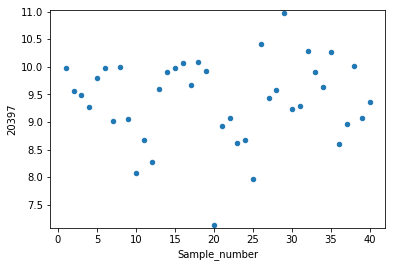

In [39]:
"""
ELF1 
""" 
df = GE_data_[GE_data_.Name==elf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name,ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

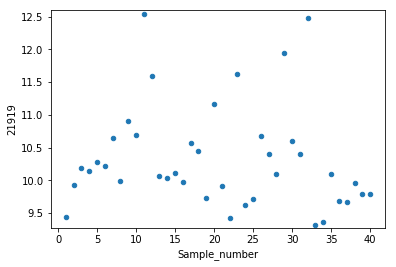

In [40]:
"""
IRF1 
""" 
df = GE_data_[GE_data_.Name==irf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

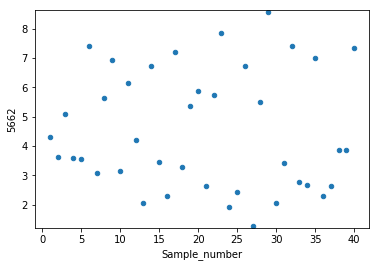

In [41]:
"""
SYNGR1
""" 
df = GE_data_[GE_data_.Name==syngr1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

In [42]:
# """
# UNC5A
# """ 
# df = GE_data_[GE_data_.Name==unc5a].T.drop(['Name'])
# column_name = df.columns.values[0]
# df[column_name] = df[column_name].astype(float)
# df['Sample_number'] = range(1, len(df) + 1)
# df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

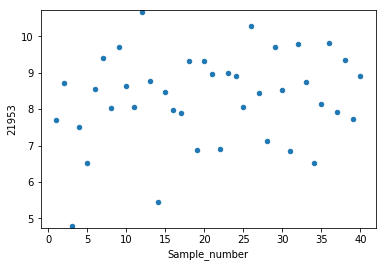

In [43]:
"""
MT1F
""" 
df = GE_data_[GE_data_.Name==mt1f].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

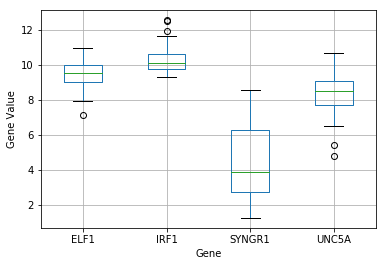

In [45]:
""" 
Box plot 
"""

df = GE_data_[GE_data_.Name.isin(gene_id_list)]
df = df.T.drop(['Name']) 
df = df.astype(float) 
df.boxplot(column=column_name_list).set_xticklabels(['ELF1', 'IRF1', 'SYNGR1','UNC5A','MT1F']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

In [46]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
GE_data_['CV'] = GE_data_.apply(lambda row : cv(row.T.drop(['Name'])), axis = 1)  
GE_data_['Gene_number'] = range(1, len(GE_data_) + 1) 

(0, 0.1)

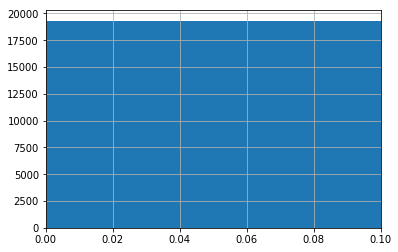

In [47]:
GE_data_['CV'].hist(bins=100).set_xlim(0,0.1)

In [48]:
for gene_ref_id in gene_id_list:
    print(GE_data_[GE_data_['Name']==gene_ref_id]['CV'] )

20397    0.080517
Name: CV, dtype: float64
21919    0.07649
Name: CV, dtype: float64
5662    0.445164
Name: CV, dtype: float64
21953    0.150862
Name: CV, dtype: float64


In [49]:
sorted_raw_expre = GE_data_.sort_values(by='CV', ascending=False).reset_index()

In [50]:
for gene_ref_id in gene_id_list:
    print("gene_ref_id",gene_ref_id)
    print(sorted_raw_expre[sorted_raw_expre['Name']==gene_ref_id].index)

gene_ref_id 212418_at
Int64Index([16359], dtype='int64')
gene_ref_id 202531_at
Int64Index([16899], dtype='int64')
gene_ref_id 210613_s_at
Int64Index([1193], dtype='int64')
gene_ref_id 217165_x_at
Int64Index([10327], dtype='int64')
